In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Mobile_df_v5.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Brand,Mobile Name,RAM(GB),Storage(GB),Processor,Number of Cameras,Primary Camera(MP),Display Type,Screen Size(in),Android Version,Battery(mAh),Number of Cores,Price(INR)
0,0,0,Moto,Motorola Edge 40,8,256,MediaTek Dimensity 8020,Dual,50,P-OLED,6.55,13.0,4400,Octa core,26999
1,1,1,Moto,Moto G54,8,128,MediaTek Dimensity 7020,Dual,50,IPS LCD,6.50,13.0,6000,Octa core,13999
2,2,2,Moto,Moto G84,8,256,Snapdragon 695,Dual,50,P-OLED,6.55,13.0,5000,Octa core,18999
3,3,3,Moto,Moto G54 256GB,12,256,MediaTek Dimensity 7020,Dual,50,IPS LCD,6.50,13.0,6000,Octa core,15999
4,4,4,Moto,Moto G32,4,64,Snapdragon 680,Triple,50,IPS LCD,6.50,12.0,5000,Octa core,10999


In [4]:
df.shape

(606, 15)

We are having 606 rows of data only.
We are having very limited data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        606 non-null    int64  
 1   Unnamed: 0          606 non-null    int64  
 2   Brand               606 non-null    object 
 3   Mobile Name         606 non-null    object 
 4   RAM(GB)             606 non-null    int64  
 5   Storage(GB)         606 non-null    int64  
 6   Processor           606 non-null    object 
 7   Number of Cameras   606 non-null    object 
 8   Primary Camera(MP)  606 non-null    int64  
 9   Display Type        606 non-null    object 
 10  Screen Size(in)     606 non-null    float64
 11  Android Version     606 non-null    float64
 12  Battery(mAh)        606 non-null    int64  
 13  Number of Cores     606 non-null    object 
 14  Price(INR)          606 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 71.1+ KB

We are having Brand, Mobile Name, Processor, Number of Cameras, Display Type, Number of Cores as Object Type and remaining are int or float type

In [6]:
df.duplicated().sum()

0

This means there are no duplicated rows in our data

In [7]:
df.isnull().sum()

Unnamed: 0.1          0
Unnamed: 0            0
Brand                 0
Mobile Name           0
RAM(GB)               0
Storage(GB)           0
Processor             0
Number of Cameras     0
Primary Camera(MP)    0
Display Type          0
Screen Size(in)       0
Android Version       0
Battery(mAh)          0
Number of Cores       0
Price(INR)            0
dtype: int64

This means there are no NULL values in our dataset

In [8]:
df.drop(['Unnamed: 0.1','Unnamed: 0','Mobile Name'],axis=1,inplace=True)
df

,Brand,RAM(GB),Storage(GB),Processor,Number of Cameras,Primary Camera(MP),Display Type,Screen Size(in),Android Version,Battery(mAh),Number of Cores,Price(INR)
0,Moto,8,256,MediaTek Dimensity 8020,Dual,50,P-OLED,6.55,13.0,4400,Octa core,26999
1,Moto,8,128,MediaTek Dimensity 7020,Dual,50,IPS LCD,6.50,13.0,6000,Octa core,13999
2,Moto,8,256,Snapdragon 695,Dual,50,P-OLED,6.55,13.0,5000,Octa core,18999
3,Moto,12,256,MediaTek Dimensity 7020,Dual,50,IPS LCD,6.50,13.0,6000,Octa core,15999
4,Moto,4,64,Snapdragon 680,Triple,50,IPS LCD,6.50,12.0,5000,Octa core,10999
...,...,...,...,...,...,...,...,...,...,...,...,...
601,iQOO,12,256,Snapdragon 888 Plus,Triple,48,AMOLED,6.56,12.0,4350,Octa core,33990
602,iQOO,12,256,Snapdragon 778G,Triple,64,IPS LCD,6.67,11.0,5000,Octa core,25990
603,iQOO,8,128,Snapdragon 768G,Triple,64,IPS LCD,6.58,11.0,4400,Octa core,20990
604,iQOO,8,128,Snapdragon 778G,Triple,64,AMOLED,6.44,12.0,4700,Octa core,24499


Removed Unnecessary columns like Unnamed: 0.1,Unnamed: 0 and Mobile Name

In [9]:
df.shape

(606, 12)

Now we are having only 12 coloumns

Mapping The text values of Number of Cores into integers

In [10]:
df['Number of Cores'] = df['Number of Cores'].str.title()

In [11]:
ValuesCount=df['Number of Cores'].value_counts()
ValuesCount

Octa Core        585
Quad Core         19
Tru-Octa Core      2
Name: Number of Cores, dtype: int64

In [12]:
df['Number of Cores'] = df['Number of Cores'].map({'Octa Core':8,'Quad Core':4,'Tru-Octa Core':8})

In [13]:
df['Number of Cores'].value_counts()

8    587
4     19
Name: Number of Cores, dtype: int64

Mapping The text values of Number of Cameras into integers

In [14]:
df['Number of Cameras'].value_counts()

Triple    252
Dual      185
Quad       93
Single     76
Name: Number of Cameras, dtype: int64

In [15]:
df['Number of Cameras'] = df['Number of Cameras'].map({'Single':1,'Dual':2,'Triple':3,'Quad':4})

In [16]:
df['Number of Cameras'].value_counts()

3    252
2    185
4     93
1     76
Name: Number of Cameras, dtype: int64

In [17]:
df.head()

,Brand,RAM(GB),Storage(GB),Processor,Number of Cameras,Primary Camera(MP),Display Type,Screen Size(in),Android Version,Battery(mAh),Number of Cores,Price(INR)
0,Moto,8,256,MediaTek Dimensity 8020,2,50,P-OLED,6.55,13.0,4400,8,26999
1,Moto,8,128,MediaTek Dimensity 7020,2,50,IPS LCD,6.50,13.0,6000,8,13999
2,Moto,8,256,Snapdragon 695,2,50,P-OLED,6.55,13.0,5000,8,18999
3,Moto,12,256,MediaTek Dimensity 7020,2,50,IPS LCD,6.50,13.0,6000,8,15999
4,Moto,4,64,Snapdragon 680,3,50,IPS LCD,6.50,12.0,5000,8,10999


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               606 non-null    object 
 1   RAM(GB)             606 non-null    int64  
 2   Storage(GB)         606 non-null    int64  
 3   Processor           606 non-null    object 
 4   Number of Cameras   606 non-null    int64  
 5   Primary Camera(MP)  606 non-null    int64  
 6   Display Type        606 non-null    object 
 7   Screen Size(in)     606 non-null    float64
 8   Android Version     606 non-null    float64
 9   Battery(mAh)        606 non-null    int64  
 10  Number of Cores     606 non-null    int64  
 11  Price(INR)          606 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 56.9+ KB


We are having only Brand, Processor, Display Type as Object Type and remaining are int or float type

<ipython-input-19-adfad2a37bd0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price(INR)'])


<Axes: xlabel='Price(INR)', ylabel='Density'>

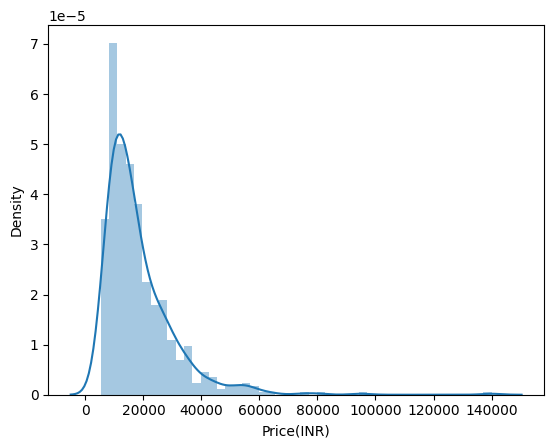

In [19]:
sns.distplot(df['Price(INR)'])

Here we can see the price column is poitive skewed. Becoz most of the mobile prices are in between 10k to 20k

<Axes: >

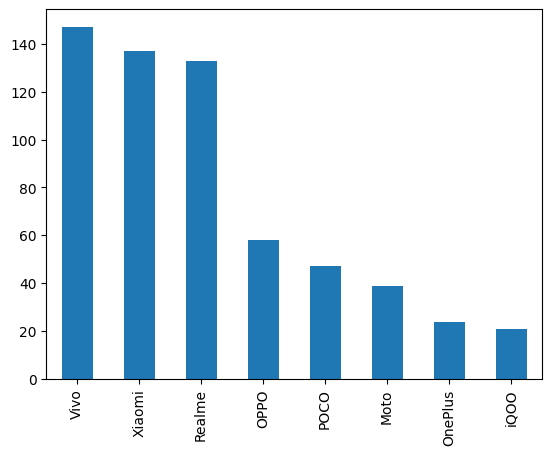

In [20]:
df['Brand'].value_counts().plot(kind='bar')

In [21]:
df.columns

Index(['Brand', 'RAM(GB)', 'Storage(GB)', 'Processor', 'Number of Cameras',
       'Primary Camera(MP)', 'Display Type', 'Screen Size(in)',
       'Android Version', 'Battery(mAh)', 'Number of Cores', 'Price(INR)'],
      dtype='object')

In [22]:
numerical_vars = ['RAM(GB)', 'Storage(GB)', 'Number of Cameras',
       'Primary Camera(MP)', 'Screen Size(in)',
       'Android Version', 'Battery(mAh)', 'Number of Cores']

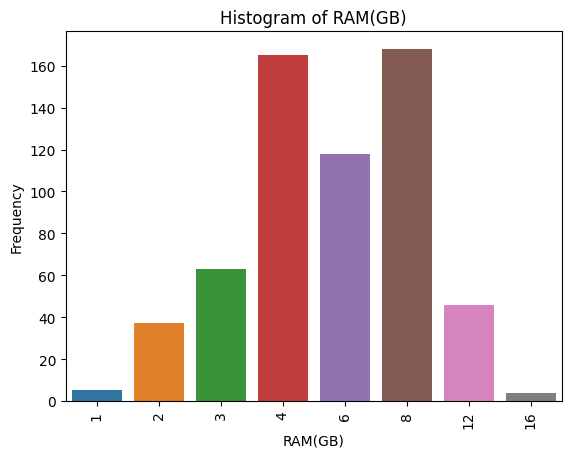

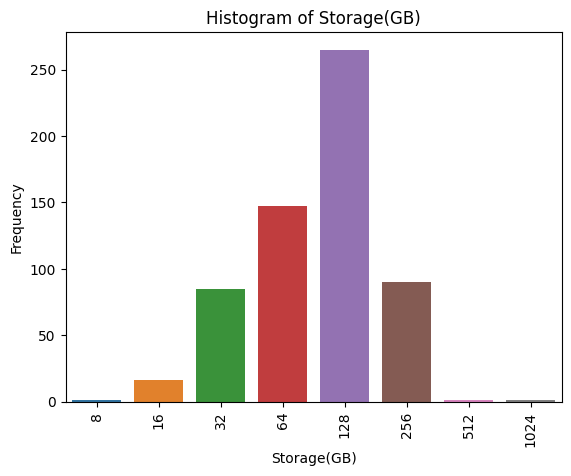

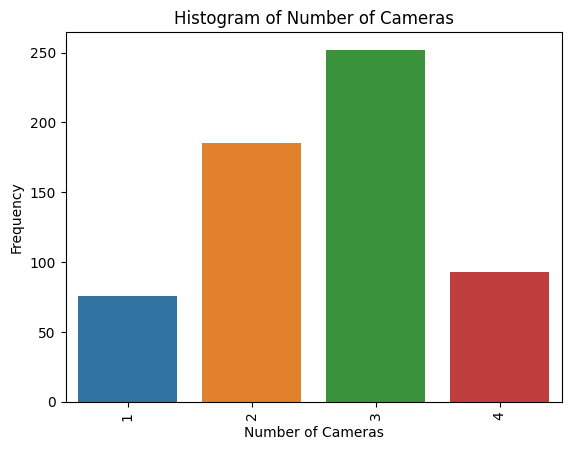

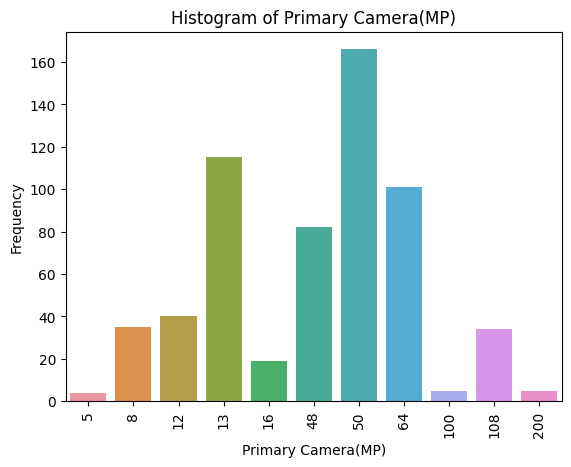

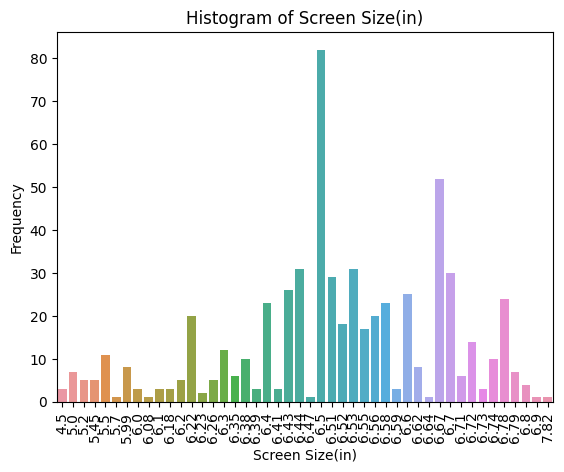

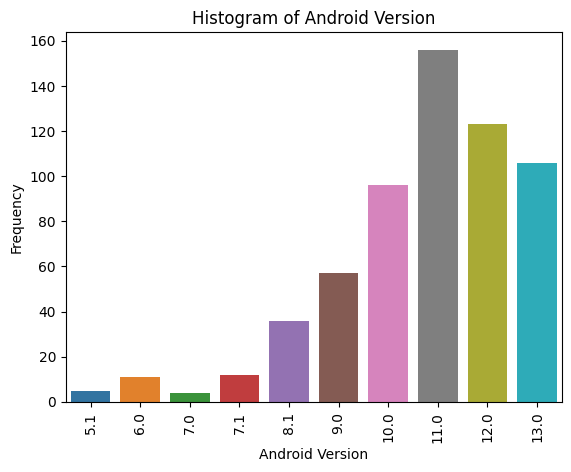

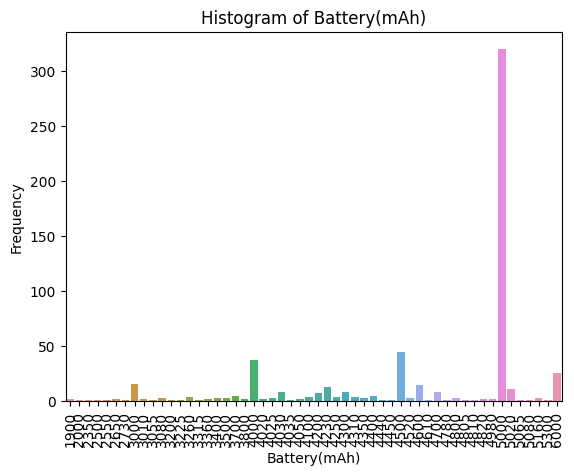

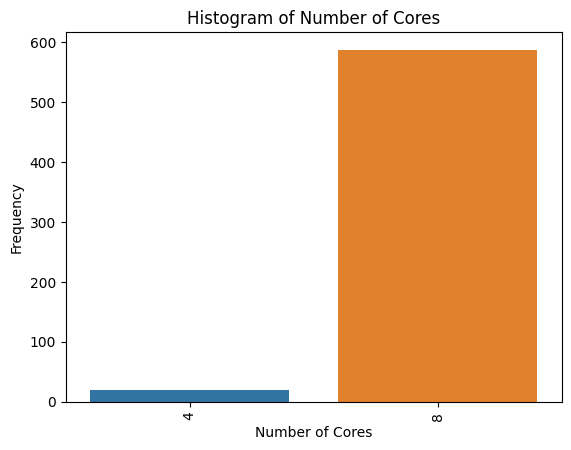

In [23]:
# Univariate Numerical variable Analysis
for i in numerical_vars:
    sns.countplot(x=i, data=df)
    # plt.hist(df[i],bins=20)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.title(f'Histogram of {i}')
    plt.show()

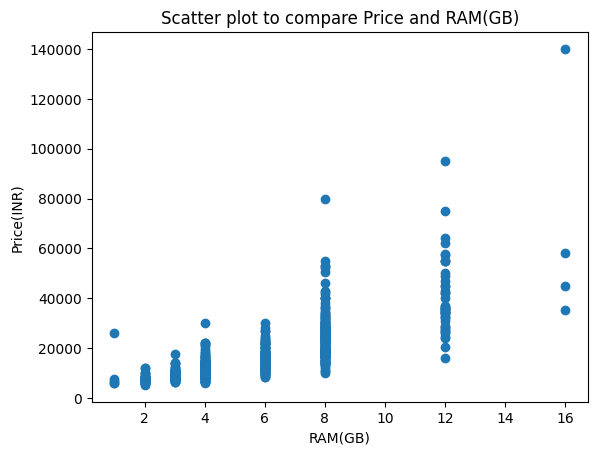

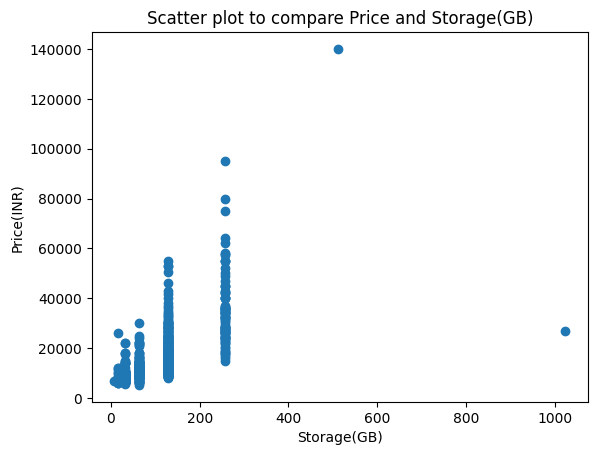

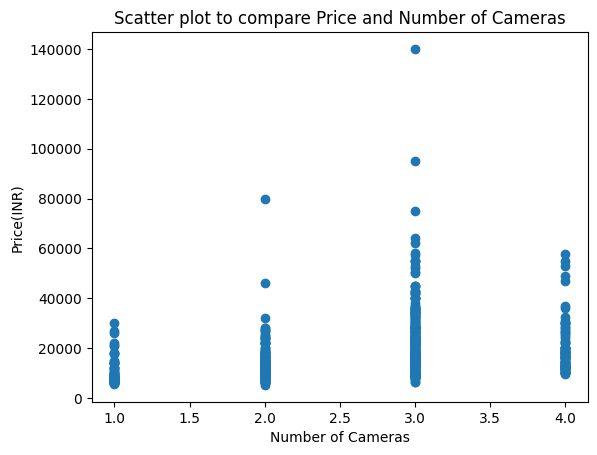

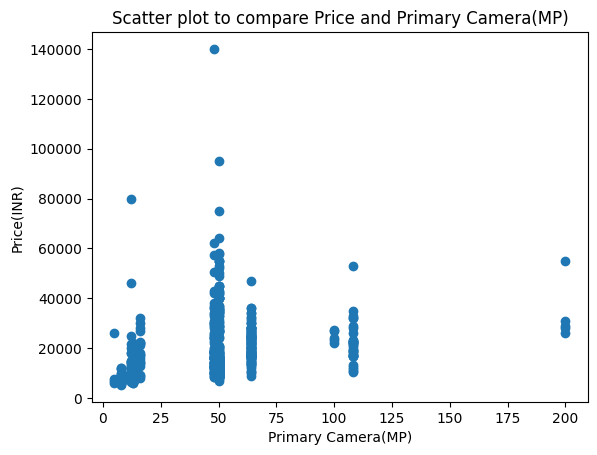

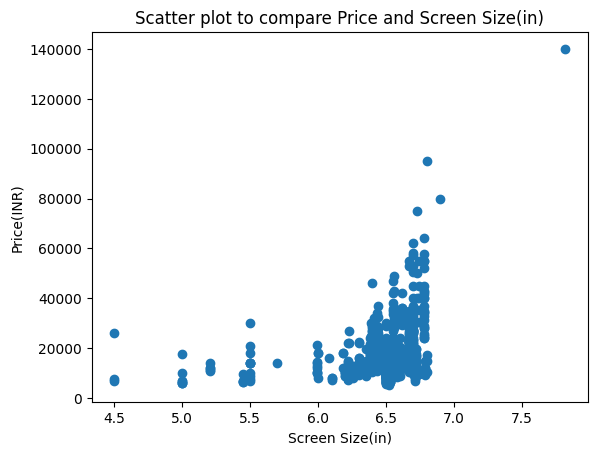

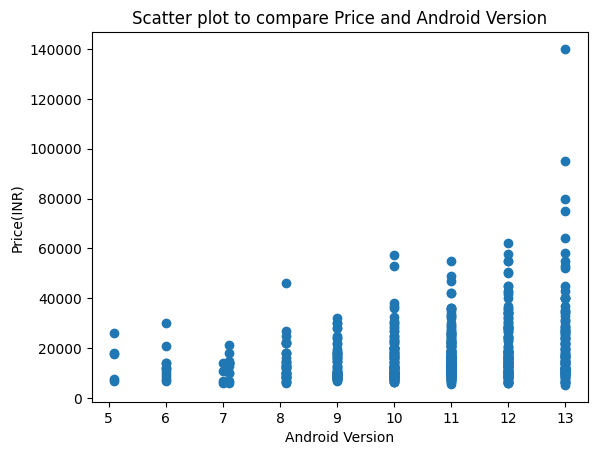

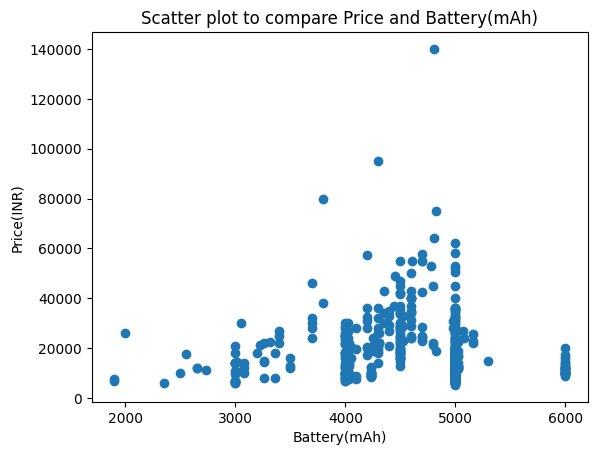

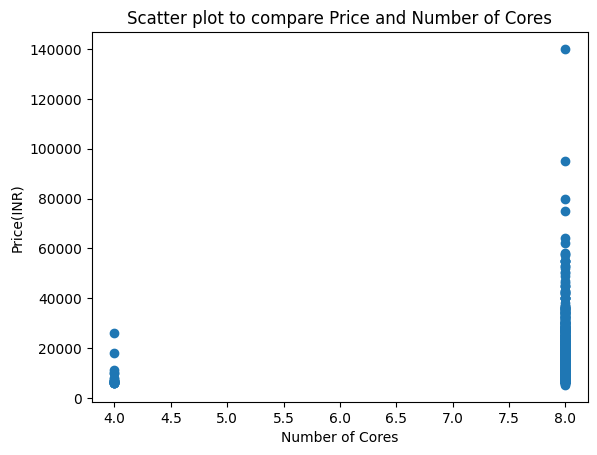

In [24]:
# Bivariate Numerical variable Analysis
for i in numerical_vars:
    plt.scatter(df[i], df['Price(INR)'])
    plt.title(f'Scatter plot to compare Price and {i}')
    plt.xlabel(i)
    plt.ylabel('Price(INR)')
    plt.show()

<Axes: xlabel='Brand', ylabel='Price(INR)'>

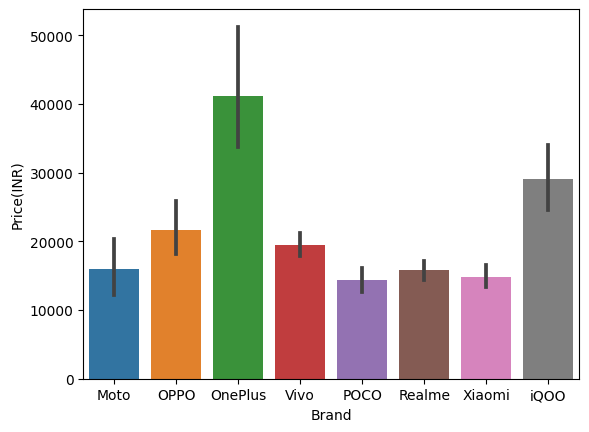

In [25]:
sns.barplot(x ='Brand', y = 'Price(INR)', data=df)

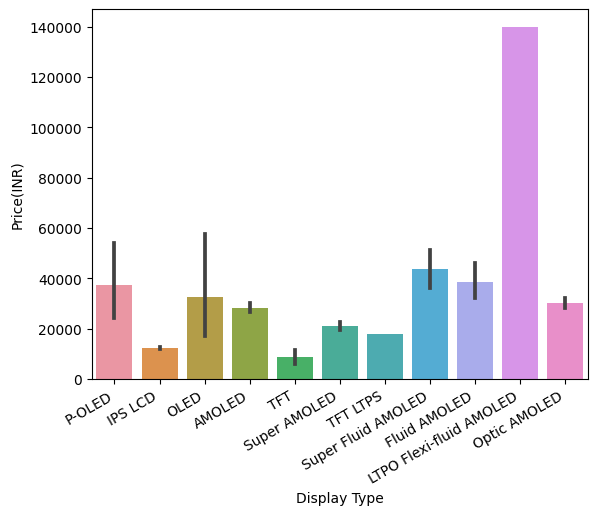

In [26]:
sns.barplot(x ='Display Type', y = 'Price(INR)', data=df)
plt.xticks(rotation=30, ha='right')
plt.show()

<ipython-input-27-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

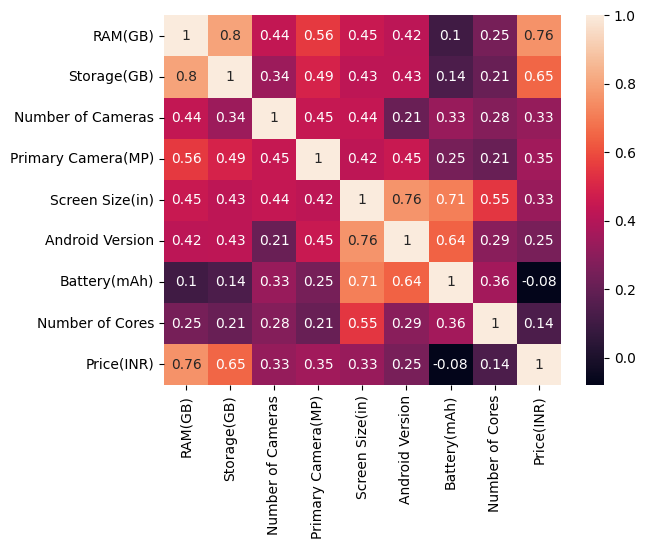

In [27]:
sns.heatmap(df.corr(),annot=True)

In [28]:
# Assuming 'df' is your DataFrame and 'Processor' is the column with processor names
def map_processor_category(name):
    if 'Snapdragon' in name:
        return 'Snapdragon'
    elif 'MediaTek Helio' in name:
        return 'MediaTek Helio'
    elif 'MediaTek Dimensity' in name:
        return 'MediaTek Dimensity'
    elif 'Unisoc' in name:
        return 'Unisoc'
    else:
        return 'Other'  # For any processors that don't fit the categories

df['Processor Brand'] = df['Processor'].apply(map_processor_category)

# Now to get the counts for each category
processor_counts = df['Processor Brand'].value_counts()

# Show the resulting counts
print(processor_counts)


Snapdragon            274
MediaTek Helio        187
MediaTek Dimensity    104
Unisoc                 32
Other                   9
Name: Processor Brand, dtype: int64


<Axes: >

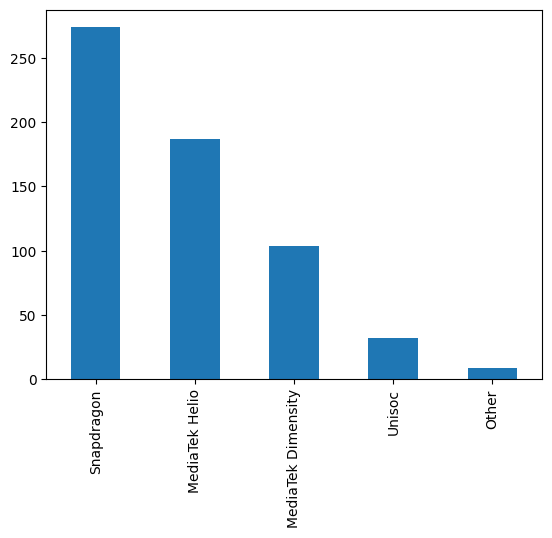

In [29]:
df['Processor Brand'].value_counts().plot(kind='bar')

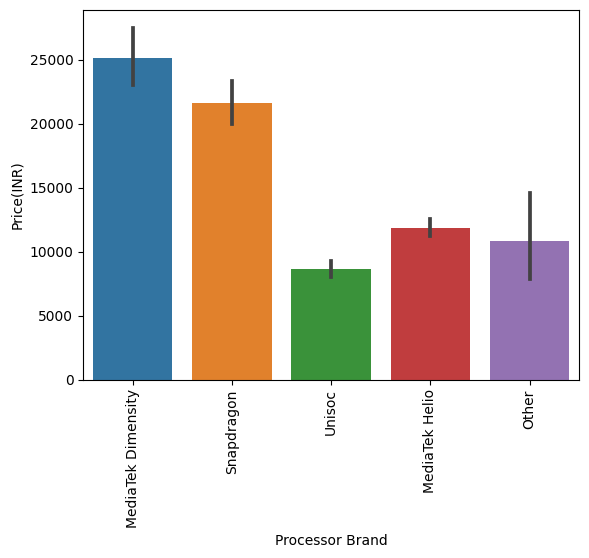

In [30]:
sns.barplot(x ='Processor Brand', y = 'Price(INR)', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
df.drop(columns=['Processor'],inplace=True)

In [32]:
df.head()

,Brand,RAM(GB),Storage(GB),Number of Cameras,Primary Camera(MP),Display Type,Screen Size(in),Android Version,Battery(mAh),Number of Cores,Price(INR),Processor Brand
0,Moto,8,256,2,50,P-OLED,6.55,13.0,4400,8,26999,MediaTek Dimensity
1,Moto,8,128,2,50,IPS LCD,6.50,13.0,6000,8,13999,MediaTek Dimensity
2,Moto,8,256,2,50,P-OLED,6.55,13.0,5000,8,18999,Snapdragon
3,Moto,12,256,2,50,IPS LCD,6.50,13.0,6000,8,15999,MediaTek Dimensity
4,Moto,4,64,3,50,IPS LCD,6.50,12.0,5000,8,10999,Snapdragon


In [33]:
df['Display Type'].value_counts()

IPS LCD                    373
AMOLED                     151
Super AMOLED                50
Fluid AMOLED                10
P-OLED                       7
Super Fluid AMOLED           6
OLED                         3
TFT                          2
Optic AMOLED                 2
TFT LTPS                     1
LTPO Flexi-fluid AMOLED      1
Name: Display Type, dtype: int64

In [34]:
# Assuming 'df' is your DataFrame and 'Display Type' is the column with display type names
def map_display_category(display_type):
    if display_type in ['IPS LCD', 'AMOLED', 'Super AMOLED', 'Fluid AMOLED', 'P-OLED', 'Super Fluid AMOLED']:
        return display_type
    else:
        return 'Other'

# Apply the function to each element of the 'Display Type' column
df['Display Type'] = df['Display Type'].apply(map_display_category)

# If you want to see the unique display categories after the mapping
unique_display_categories = df['Display Type'].unique()

# Show the unique categories
print(unique_display_categories)



['P-OLED' 'IPS LCD' 'Other' 'AMOLED' 'Super AMOLED' 'Super Fluid AMOLED'
 'Fluid AMOLED']


<Axes: >

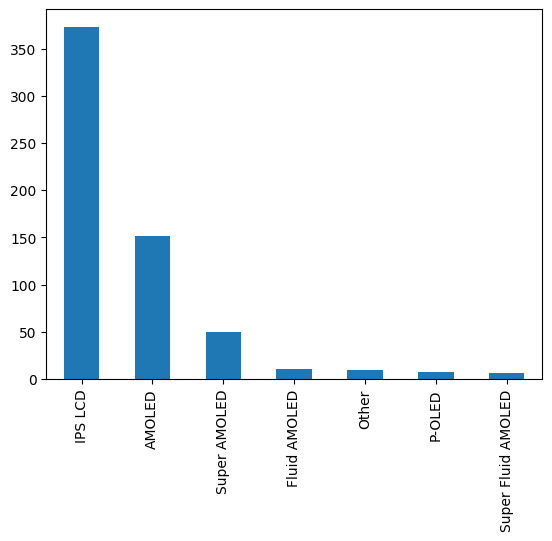

In [35]:
df['Display Type'].value_counts().plot(kind='bar')

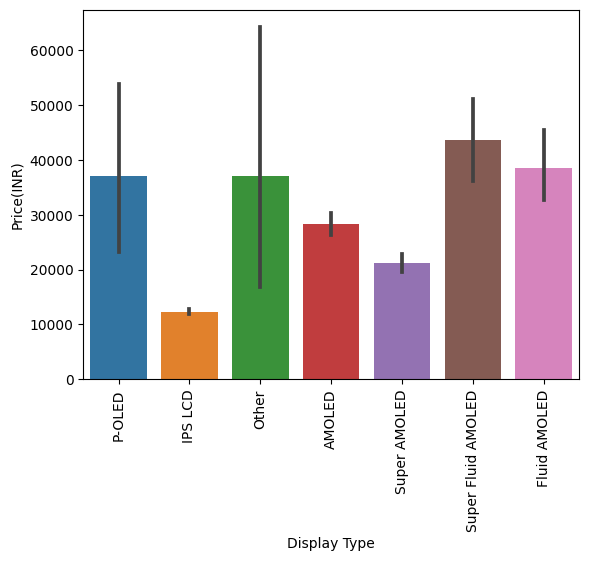

In [36]:
sns.barplot(x ='Display Type', y = 'Price(INR)', data=df)
plt.xticks(rotation='vertical')
plt.show()


<ipython-input-37-171f19b49b6e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price(INR)']))


<Axes: xlabel='Price(INR)', ylabel='Density'>

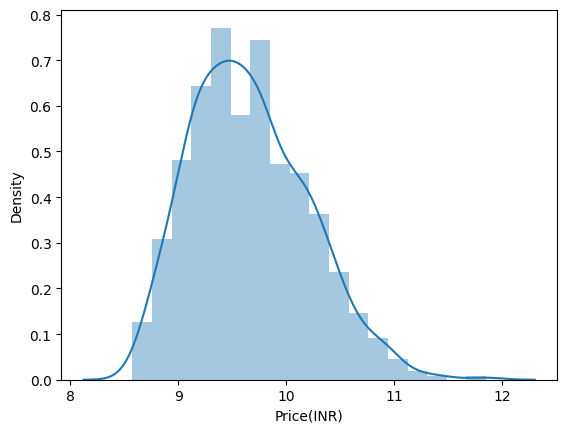

In [37]:
sns.distplot(np.log(df['Price(INR)']))

Now the Skewness in the data is not present. It is Normally Distributed

In [38]:
np.log(df['Price(INR)'])

0      10.203555
1       9.546741
2       9.852142
3       9.680281
4       9.305560
         ...    
601    10.433822
602    10.165467
603     9.951801
604    10.106388
605     9.615739
Name: Price(INR), Length: 606, dtype: float64

In [39]:
df

,Brand,RAM(GB),Storage(GB),Number of Cameras,Primary Camera(MP),Display Type,Screen Size(in),Android Version,Battery(mAh),Number of Cores,Price(INR),Processor Brand
0,Moto,8,256,2,50,P-OLED,6.55,13.0,4400,8,26999,MediaTek Dimensity
1,Moto,8,128,2,50,IPS LCD,6.50,13.0,6000,8,13999,MediaTek Dimensity
2,Moto,8,256,2,50,P-OLED,6.55,13.0,5000,8,18999,Snapdragon
3,Moto,12,256,2,50,IPS LCD,6.50,13.0,6000,8,15999,MediaTek Dimensity
4,Moto,4,64,3,50,IPS LCD,6.50,12.0,5000,8,10999,Snapdragon
...,...,...,...,...,...,...,...,...,...,...,...,...
601,iQOO,12,256,3,48,AMOLED,6.56,12.0,4350,8,33990,Snapdragon
602,iQOO,12,256,3,64,IPS LCD,6.67,11.0,5000,8,25990,Snapdragon
603,iQOO,8,128,3,64,IPS LCD,6.58,11.0,4400,8,20990,Snapdragon
604,iQOO,8,128,3,64,AMOLED,6.44,12.0,4700,8,24499,Snapdragon


In [40]:
X = df.drop(columns=['Price(INR)'])
y = np.log(df['Price(INR)'])

In [41]:
X

,Brand,RAM(GB),Storage(GB),Number of Cameras,Primary Camera(MP),Display Type,Screen Size(in),Android Version,Battery(mAh),Number of Cores,Processor Brand
0,Moto,8,256,2,50,P-OLED,6.55,13.0,4400,8,MediaTek Dimensity
1,Moto,8,128,2,50,IPS LCD,6.50,13.0,6000,8,MediaTek Dimensity
2,Moto,8,256,2,50,P-OLED,6.55,13.0,5000,8,Snapdragon
3,Moto,12,256,2,50,IPS LCD,6.50,13.0,6000,8,MediaTek Dimensity
4,Moto,4,64,3,50,IPS LCD,6.50,12.0,5000,8,Snapdragon
...,...,...,...,...,...,...,...,...,...,...,...
601,iQOO,12,256,3,48,AMOLED,6.56,12.0,4350,8,Snapdragon
602,iQOO,12,256,3,64,IPS LCD,6.67,11.0,5000,8,Snapdragon
603,iQOO,8,128,3,64,IPS LCD,6.58,11.0,4400,8,Snapdragon
604,iQOO,8,128,3,64,AMOLED,6.44,12.0,4700,8,Snapdragon


In [42]:
y

0      10.203555
1       9.546741
2       9.852142
3       9.680281
4       9.305560
         ...    
601    10.433822
602    10.165467
603     9.951801
604    10.106388
605     9.615739
Name: Price(INR), Length: 606, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [44]:
X_train

,Brand,RAM(GB),Storage(GB),Number of Cameras,Primary Camera(MP),Display Type,Screen Size(in),Android Version,Battery(mAh),Number of Cores,Processor Brand
116,OnePlus,12,256,3,50,AMOLED,6.43,12.0,4500,8,MediaTek Dimensity
511,Xiaomi,6,128,2,50,IPS LCD,6.58,12.0,5000,8,MediaTek Dimensity
188,Vivo,3,32,2,13,IPS LCD,6.35,9.0,5000,8,Snapdragon
402,Realme,3,32,1,8,IPS LCD,6.50,11.0,5000,8,Unisoc
161,Vivo,8,128,2,64,AMOLED,6.38,13.0,4500,8,Snapdragon
...,...,...,...,...,...,...,...,...,...,...,...
534,Xiaomi,8,128,3,64,IPS LCD,6.67,10.0,5000,8,Snapdragon
584,Xiaomi,8,256,2,50,IPS LCD,6.79,13.0,5000,8,Snapdragon
493,Xiaomi,4,64,1,13,IPS LCD,5.50,6.0,4100,8,Snapdragon
527,Xiaomi,6,64,4,50,AMOLED,6.43,11.0,5000,8,Snapdragon


In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [46]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

Linear Regression

In [47]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,5,10])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8522854054326139
MAE 0.16234625760870047


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Ridge Regression

In [48]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,5,10])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8476250270760605
MAE 0.16436136719150415


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Lasso Regression

In [49]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,5,10])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8543997602247216
MAE 0.1626452577789219


KNN

In [50]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,5,10])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7604227317262363
MAE 0.2005917208038635


Decision Tree

In [51]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,5,10])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8405129956868772
MAE 0.15300642840860318


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SVM

In [52]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,5,10])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7704947860869344
MAE 0.20638633859872652


Random Forest

In [53]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,5,10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8940115995975255
MAE 0.13817373243445877


XgBoost

In [54]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,5,10])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9177073727969312
MAE 0.11814967142767811


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Gradient Boost

In [58]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,5,10])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9276396116380389
MAE 0.11108050984185898


Exporting the Model

In [59]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [71]:
df['Processor Brand'].unique()

array(['MediaTek Dimensity', 'Snapdragon', 'Unisoc', 'MediaTek Helio',
       'Other'], dtype=object)

In [61]:
X_train

,Brand,RAM(GB),Storage(GB),Number of Cameras,Primary Camera(MP),Display Type,Screen Size(in),Android Version,Battery(mAh),Number of Cores,Processor Brand
116,OnePlus,12,256,3,50,AMOLED,6.43,12.0,4500,8,MediaTek Dimensity
511,Xiaomi,6,128,2,50,IPS LCD,6.58,12.0,5000,8,MediaTek Dimensity
188,Vivo,3,32,2,13,IPS LCD,6.35,9.0,5000,8,Snapdragon
402,Realme,3,32,1,8,IPS LCD,6.50,11.0,5000,8,Unisoc
161,Vivo,8,128,2,64,AMOLED,6.38,13.0,4500,8,Snapdragon
...,...,...,...,...,...,...,...,...,...,...,...
534,Xiaomi,8,128,3,64,IPS LCD,6.67,10.0,5000,8,Snapdragon
584,Xiaomi,8,256,2,50,IPS LCD,6.79,13.0,5000,8,Snapdragon
493,Xiaomi,4,64,1,13,IPS LCD,5.50,6.0,4100,8,Snapdragon
527,Xiaomi,6,64,4,50,AMOLED,6.43,11.0,5000,8,Snapdragon
